In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns

# Load file

In [95]:
data = pd.read_excel('/content/drive/MyDrive/summer_project_2021/NZ_Admin_JOBS.xlsx')

In [96]:
data.head()

,字段1,字段1_link,字段2,字段3,字段4,字段5
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...


In [97]:
data.shape
# 2708 6

(2708, 6)

# Preprocessing

In [ ]:
# col_names = []
# for col in data.columns:
#     col_names += [col]
# col_names

In [98]:
data = data.rename(columns = {'字段1':'job_title', '字段1_link':'link', '字段2':'company_name', '字段3':'location', '字段4':'time', '字段5':'mix'})

## first column: job_title

In [ ]:
# check if there missing values(NA)
data.job_title.isnull().values.any()

False

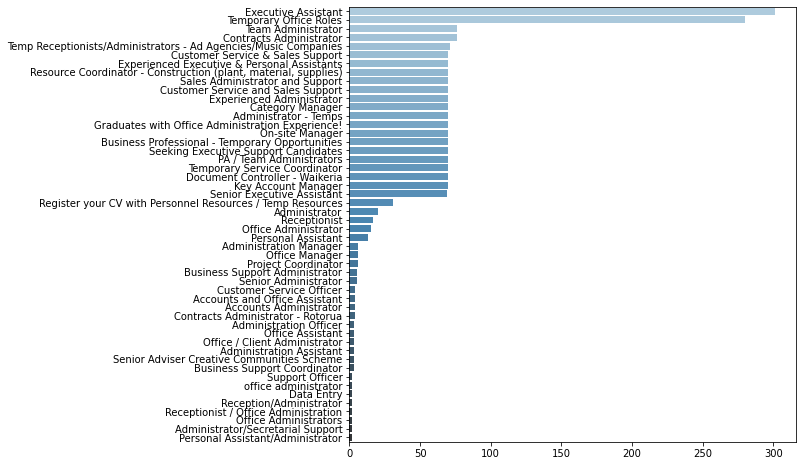

In [9]:
# unique job title to check if there are two positions mean the same role
set(data.job_title)

# check the frequencies of job titles
job = list(data.job_title)
fdist = pd.Series(dict(FreqDist(job).most_common(50)))

plt.figure(figsize=(8,8))
inj_plot = sns.barplot(y=fdist.index, x=fdist.values, palette="Blues_d")

no need to clean the first column

## second column: link

In [20]:
data.link

0       https://www.seek.co.nz/job/50582301?type=promo...
1       https://www.seek.co.nz/job/50620889?type=promo...
2       https://www.seek.co.nz/job/50622169?type=stand...
3       https://www.seek.co.nz/job/50639620?type=stand...
4       https://www.seek.co.nz/job/50622432?type=stand...
                              ...                        
2703    https://www.seek.co.nz/job/50490062?type=stand...
2704    https://www.seek.co.nz/job/50488000?type=stand...
2705    https://www.seek.co.nz/job/50524865?type=stand...
2706    https://www.seek.co.nz/job/50477118?type=stand...
2707    https://www.seek.co.nz/job/50496571?type=stand...
Name: link, Length: 2708, dtype: object

In [18]:
# check if there missing values(NA)
data.link.isnull().values.any()

False

In [19]:
# check if there is an duplicate values
len(set(data.link))

2708

no need to modify the second column value as they are all in the same format and there is no missing values as well as duplications.

## third column: company_name & fifth column: time

In [21]:
data.company_name

0                                            NaN
1                           Avenues Orthodontics
2                             New Zealand Police
3       Kew Pacific Island Early Learning Centre
4                                            NaN
                          ...                   
2703                       Hays Talent Solutions
2704                      one eighty recruitment
2705                       Asset Recruitment Ltd
2706                       Asset Recruitment Ltd
2707                      Alpha Recruitment - NZ
Name: company_name, Length: 2708, dtype: object

In [25]:
# check if there missing values(NA)
# set(data.company_name.isnull().values)

company = list(data.company_name)
fdist = pd.Series(dict(FreqDist(company)))
fdist

NaN                                         22
Avenues Orthodontics                         2
New Zealand Police                           3
Kew Pacific Island Early Learning Centre     1
Ministry for Primary Industries              1
                                            ..
Piritahi                                    70
Uniform Group (Auckland) Ltd                70
Wellfit-Wstar                               70
Stonewood Group Ltd                         70
Stellar Recruitment                         70
Length: 476, dtype: int64

In [83]:
# set(data['time'].str.split(',at', expand=True)[1])
pd.Series(dict(FreqDist(data['time'].str.split(',at', expand=True)[1])))

,Private Advertiser      22
                       2686
dtype: int64

In [82]:
data.head()

,job_title,link,company_name,location,time,mix
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,NaN,Bay of PlentyBay of Plentyarea: TaurangaTauranga,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of PlentyBay of Plentyarea: TaurangaTauranga,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,SouthlandSouthlandarea: InvercargillInvercargill,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,NaN,CanterburyCanterburyarea: ChristchurchChristch...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...


it can be checked there are 22 company names that are not given, but the value in 'time' attributes shows that these 22 companies are 'private advertiser'. So replace the NaN in company_name columns to 'private advertiser' and remove them in time column.

In [102]:
data.company_name = data.company_name.fillna('Private Advertiser')
data.time = data['time'].str.split(',at', expand=True)[0]
# df.fillna(0)

In [103]:
data.head()

,job_title,link,company_name,location,time,mix
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,location: Bay of PlentyBay of Plentyarea: Taur...,Featured,classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,Featured,classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,4d ago,classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,1h ago,classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,location: CanterburyCanterburyarea: Christchur...,4d ago,classification: Administration & Office Suppor...


## fourth column: location

In [104]:
data.location
# remove 'location:' in each row

0       location: Bay of PlentyBay of Plentyarea: Taur...
1       location: Bay of PlentyBay of Plentyarea: Taur...
2                              location: AucklandAuckland
3       location: SouthlandSouthlandarea: Invercargill...
4       location: CanterburyCanterburyarea: Christchur...
                              ...                        
2703    location: AucklandAucklandarea: Auckland Centr...
2704    location: WellingtonWellingtonarea: Wellington...
2705    location: WaikatoWaikatoarea: HamiltonHamilton...
2706    location: WaikatoWaikatoarea: HamiltonHamilton...
2707                       location: WellingtonWellington
Name: location, Length: 2708, dtype: object

In [105]:
# check if all rows contain 'location: '
a = []
for i in range(len(data)):
  a.append(data.location[i][0:10])

set(a)

{'location: '}

every row contains 'location: ' which is useless in this case, so consider remove it from each row.

In [106]:
# # df
# pd.concat([data, data['location'].str.split(':', expand=True)], axis=1)
data['location'] = data['location'].str.split('location: ', expand=True)[1]

In [107]:
data.head()

,job_title,link,company_name,location,time,mix
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Bay of PlentyBay of Plentyarea: TaurangaTauranga,Featured,classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of PlentyBay of Plentyarea: TaurangaTauranga,Featured,classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,AucklandAuckland,4d ago,classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,SouthlandSouthlandarea: InvercargillInvercargill,1h ago,classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,CanterburyCanterburyarea: ChristchurchChristch...,4d ago,classification: Administration & Office Suppor...


## sixth column: mix

In [108]:
data.mix

0       classification: Administration & Office Suppor...
1       classification: Administration & Office Suppor...
2       classification: Administration & Office Suppor...
3       classification: Administration & Office Suppor...
4       classification: Administration & Office Suppor...
                              ...                        
2703    classification: Administration & Office Suppor...
2704                              Competitive hourly rate
2705                          Competitive hourly rates $$
2706                          Competitive hourly rates $$
2707    classification: Administration & Office Suppor...
Name: mix, Length: 2708, dtype: object

there are two kinds of values in this column: salary and classification

split these two values into two new columns: salary and classification

not sure the meaning of 'featured' but the rest values mean the post time of the specify job.

In [122]:
data['salary'] = data['mix'].str.split('classification:', expand=True)[0]
data['classification'] = data['mix'].str.split('classification:', expand=True)[1]
data = data.drop('mix', 1)

In [123]:
data.head()

,job_title,link,company_name,location,time,salary,classification
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,Private Advertiser,Bay of PlentyBay of Plentyarea: TaurangaTauranga,Featured,,Administration & Office SupportAdministration...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,Bay of PlentyBay of Plentyarea: TaurangaTauranga,Featured,,Administration & Office SupportAdministration...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,AucklandAuckland,4d ago,,Administration & Office SupportAdministration...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,SouthlandSouthlandarea: InvercargillInvercargill,1h ago,,Administration & Office SupportAdministration...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,Private Advertiser,CanterburyCanterburyarea: ChristchurchChristch...,4d ago,,Administration & Office SupportAdministration...


In [119]:
len(set(data.classification))
# 10
pd.Series(dict(FreqDist(data.classification)))

 Administration & Office SupportAdministration & Office SupportsubClassification: Office ManagementOffice Management                                            112
 Administration & Office SupportAdministration & Office SupportsubClassification: ReceptionistsReceptionists                                                    196
 Administration & Office SupportAdministration & Office SupportsubClassification: OtherOther                                                                    116
 Administration & Office SupportAdministration & Office SupportsubClassification: Administrative AssistantsAdministrative Assistants                            715
 Administration & Office SupportAdministration & Office SupportsubClassification: Client & Sales AdministrationClient & Sales Administration                    336
 Administration & Office SupportAdministration & Office SupportsubClassification: Data Entry & Word ProcessingData Entry & Word Processing                       13
NaN             

there are 9 classes given in this case and 603 rows do not contain the information of their class but there salaries in hour or year

In [120]:
set(data.salary)

{'',
 '$18.50 - $23.50 per hour',
 '$19 to $22 per hour',
 '$20 - $24.99 per hour',
 '$20 - $24.99 per hour dependent on experience.',
 '$20 - $25 per hour',
 '$20 - $29.99 per hour',
 '$20 - $30 per hour',
 '$20 - $40 per hour',
 '$20 per hour',
 '$20.00 per hour',
 '$20.00 per hour.',
 '$21 - $22 p.h. + 8% Holiday Pay',
 '$21 - $25 p.h. + 8% Holiday Pay',
 '$21 per hour',
 '$21-$23 per hour',
 '$22 per hour',
 '$22.00 - $23.00 phr',
 '$24 - $25 + 8% holiday pay!',
 '$24 - $28 p.h.  + 8% Holiday Pay',
 '$24-$28',
 '$25 - $29.99 per hour',
 '$25 per hour',
 '$25.5',
 '$27 - $33 p.h. + 8% holiday pay',
 '$30 - $38 p.h. + 8% Holiday Pay',
 '$35 - $39.99 per hour',
 '$35 - $40 p.h. + + 8% Holiday Pay',
 '$40 - $45 per hour',
 '$40,000 - $49,999',
 '$45,000 - $49,999',
 '$45,000 - $54,999',
 '$45,000 - $55,000 depending on experience',
 '$45,000 - $59,999',
 '$45-$55,000',
 '$48,000 - $55,000',
 '$48,835 - $63,221',
 '$50,000 - $54,999',
 '$50,000 - $55,000 plus benefits',
 '$50,000 - $59,